# Exercise 00 : Line chart

In [1]:
import pandas as pd
import sqlite3

## • make a connection to the database (it is the same as the previous day)

In [2]:
try:
    connection = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
    print("Successfully connect to the database")
except sqlite3.Error as error:
    print("Error when connecting to the database", error)

Successfully connect to the database


## • run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [3]:
query = "select uid, datetime from pageviews where uid like 'user_%'"
df = pd.io.sql.read_sql(query, connection, parse_dates=['datetime'])
df.head(10)

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
5,user_17,2020-04-18 12:06:13.237290
6,user_17,2020-04-18 12:06:35.574114
7,user_10,2020-04-18 12:19:50.182714
8,user_14,2020-04-18 18:14:53.813657
9,user_14,2020-04-18 18:20:05.419381


## • using Pandas, create a new dataframe where the visits are counted and grouped by date

In [4]:
df1 = df['datetime'].dt.floor('D').value_counts().rename_axis('date').reset_index(name='views')
df1

,date,views
0,2020-05-11,200
1,2020-05-14,187
2,2020-05-10,110
3,2020-05-13,102
4,2020-05-12,85
5,2020-05-18,51
6,2020-05-08,48
7,2020-05-15,29
8,2020-04-18,23
9,2020-05-03,19


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    33 non-null     datetime64[ns]
 1   views   33 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 656.0 bytes


## • using Pandas method .plot(), create a graph

◦ the size of the font should be 8

◦ the size of the ﬁgure is (15,8)

◦ the graph must have the title Views per day

◦ notice the rotation of xticks on the graph below

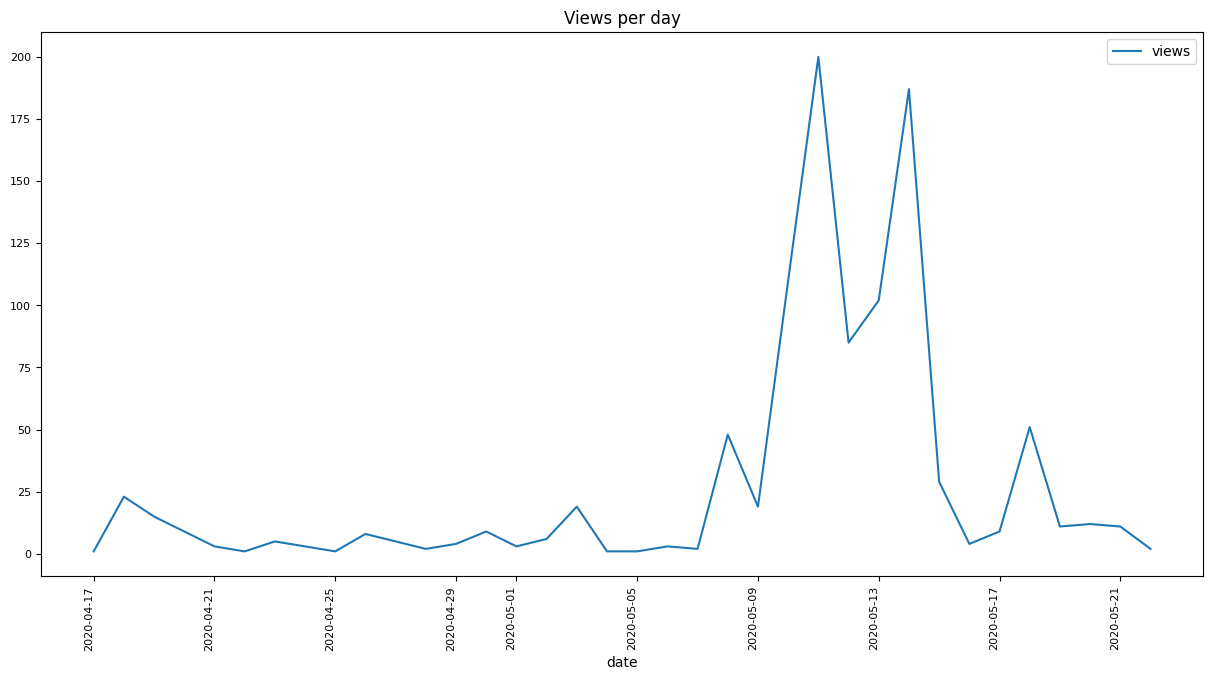

In [6]:
ax = df1.plot(x='date', y='views', figsize=(15, 8), title='Views per day', fontsize=8, rot=90)

## • close the connection to the database

In [7]:
connection.close()